In [1]:
using SciMLBase
using OrdinaryDiffEq
using ForwardDiff
import ForwardDiff: jacobian

using StaticArrays
using LinearAlgebra
using Statistics

using JLD2
using Dates

using PyPlot

In [2]:
abstract type ODEType end
abstract type AbstractTask end

---
## Загрузка библиотек и модулей

---

In [3]:
include("Utils\\Anon_Utils.jl")
include("Utils\\CallBack_Utils.jl")
include("Utils\\Computation_Utils.jl")
include("Tasks\\ODE_Solving_Task.jl")
include("ODEs\\SL_ODE.jl")
include("Utils\\Visualization_Utils.jl")
include("Utils\\PeriodSync_Utils.jl")
include("Utils\\Session_Utils.jl")

---

## Система Стюарта-Ландау

---

In [4]:
r = 1.0
omega = 1.0
s = 1/4

SL = SL_ODE(r, omega, s)

time_span = 100.0
ic = [1.0, 0.0]

trans_time = 10.0
alg = DP8()
callback = nothing
kwargs = Dict(:dt => 1e-1, :abstol => 1e-13, :reltol => 1e-13, :maxiters => 1e10)


ODESolve = ODESolve_Task(SL, time_span, ic; trans_time, alg, callback, kwargs)

[ODE::SL_ODE]: [r::Float64]: 1.0
[omega::Float64]: 1.0
[s::Float64]: 0.25

[time_span::Float64]: 100.0
[init_cond::Vector{Float64}]: [1.0, 0.0]
[trans_time::Float64]: 10.0
[alg::DP8]: DP8()
[callback::Nothing]: nothing
[kwargs::Dict{Symbol, Any}]: Dict{Symbol, Any}(:maxiters => 1.0e10, :reltol => 1.0e-13, :abstol => 1.0e-13, :dt => 0.1)
[solution::Nothing]: nothing


In [5]:
sol = ODESolve()

[t]: 698-element Vector{Float64}
[y]: 2-element Vector{Vector{Float64}} with size 698
[t_events]: 1-element Vector{Vector{Float64}} with size 0
[y_events]: 1-element Vector{Matrix{Float64}} with size 0x0
[retcode]: Success


### Time series

In [6]:
title = "Stuart-Landau"
plotKwargs = Dict(:linewidth => 3)

TS_properties = Dict("title" => title, "kwargs" => plotKwargs)

Dict{String, Any} with 2 entries:
  "kwargs" => Dict(:linewidth=>3)
  "title"  => "Stuart-Landau"

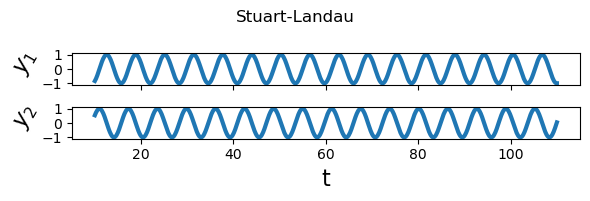

In [7]:
fig = plotTimeSeries(sol; plot_properties = TS_properties);

### Period

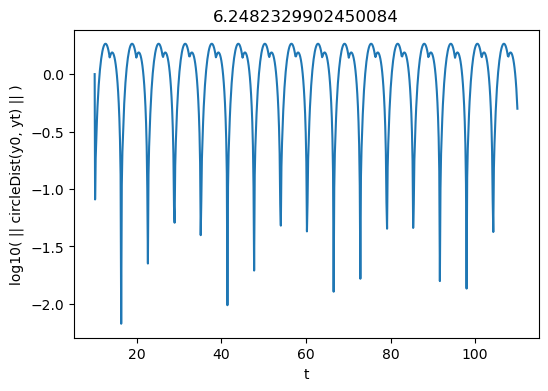

In [8]:
plotNorms(sol)

In [42]:
period = getPeriodTime(sol)

6.2482329902450084

### Tangent system

In [81]:
SL_tg = TangentODE(SL, 2)

time_span = 2*pi
u0 = [1.0, 0.0]
Q0 = [1.0 0.0; 0.0 1.0]

alg = DP8()
kwargs = Dict(:dt => 1e-1, :abstol => 1e-13, :reltol => 1e-13, :maxiters => 1e10)

ODESolve = TanODESolve_Task(SL_tg, time_span, u0, Q0; alg, kwargs)

[ODE::TangentODE]: [ODE::SL_ODE]: [r::Float64]: 1.0
[omega::Float64]: 1.0
[s::Float64]: 0.25

[Jacobian::var"#47#49"{Int64}]: #47
[ODEDim::Int64]: 2
[JacDim::Int64]: 2

[time_span::Float64]: 6.283185307179586
[u0::Vector{Float64}]: [1.0, 0.0]
[Q0::Matrix{Float64}]: [1.0 0.0; 0.0 1.0]
[alg::DP8]: DP8()
[kwargs::Dict{Symbol, Any}]: Dict{Symbol, Any}(:maxiters => 1.0e10, :reltol => 1.0e-13, :abstol => 1.0e-13, :dt => 0.1)
[solution::Nothing]: nothing


In [82]:
tansol = ODESolve()

[t]: 45-element Vector{Float64}
[y]: 6-element Vector{Vector{Float64}} with size 45
[t_events]: 1-element Vector{Vector{Float64}} with size 0
[y_events]: 1-element Vector{Matrix{Float64}} with size 0x0
[retcode]: Success


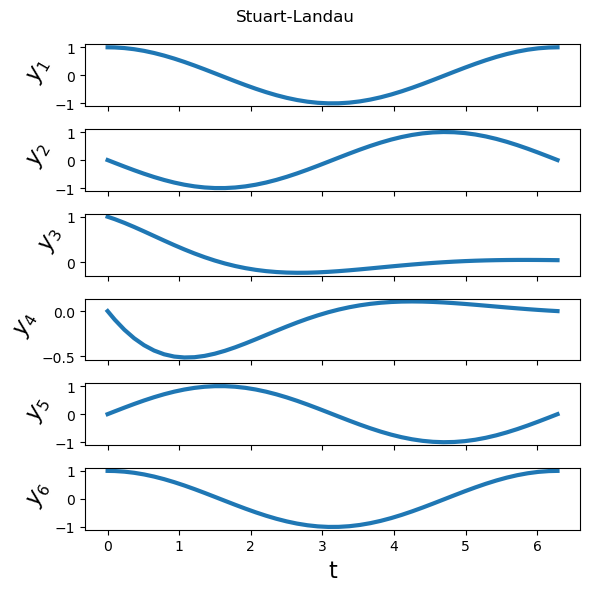

In [83]:
fig = plotTimeSeries(tansol; plot_properties = TS_properties);

In [84]:
W = [y[end] for y in tansol.y][3:6]

4-element Vector{Float64}:
  0.04321391826376782
 -1.7903645248993568e-14
 -6.38213423949607e-14
  1.0000000000000508

In [85]:
reshape(W, (2, 2))

2×2 Matrix{Float64}:
  0.0432139    -6.38213e-14
 -1.79036e-14   1.0